Diabetes Predictions

In [4]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

display(dataset)


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
import pandas as pd
df_diabetes = pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

display(df_diabetes.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
# Independent and dependent features
x = df_diabetes
y = dataset['target']

#train split
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

display(x_train.head())

#correlation
print("--------correlation-----------------")
display(x_train.corr().head())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


--------correlation-----------------


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280


<Axes: >

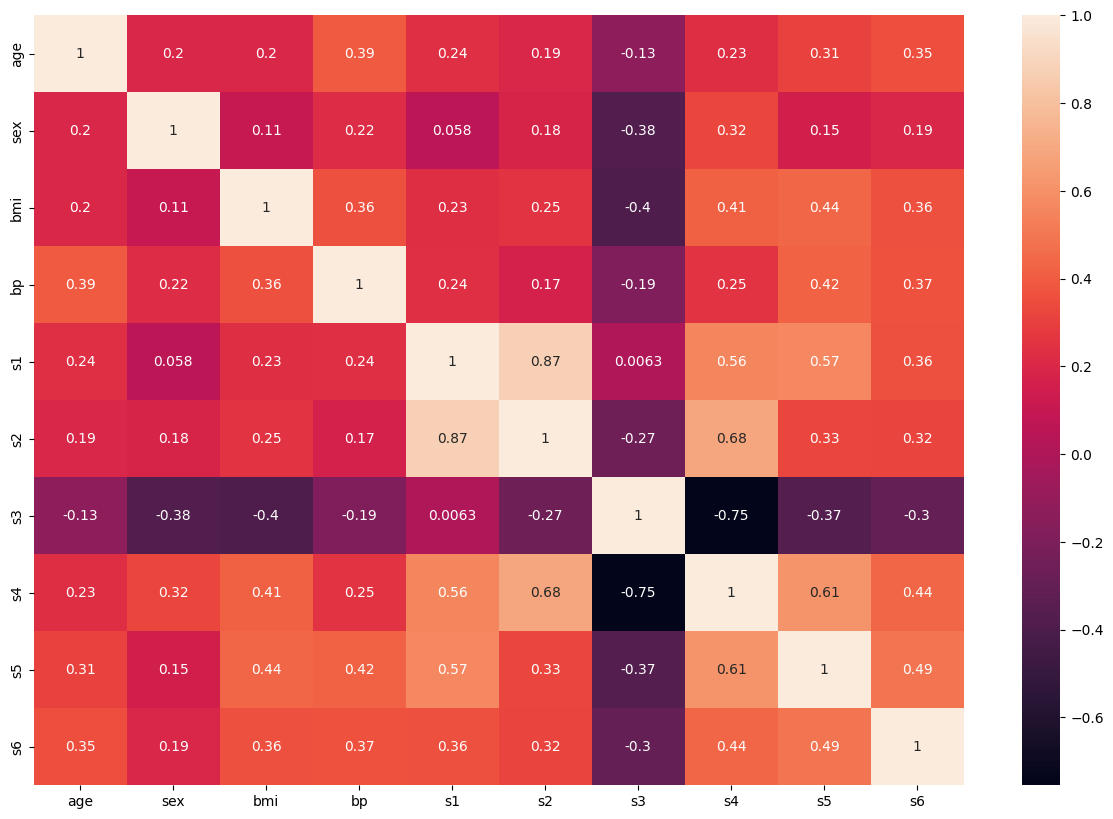

In [15]:
# show the correlation with heatmap 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(), annot=True)

Apply Decision Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

regressor.fit(x_train, y_train)

DecisionTreeRegressor()

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


HyperParameter Tuning

In [18]:
param={
    "criterion":['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1, 2, 3, 4, 5, 10, 15, 20, 25],
    'max_features':['auto','sqrt','log2']
}

from sklearn.model_selection import GridSearchCV

regrressor = DecisionTreeRegressor()

grid = GridSearchCV(regressor,param_grid=param, cv=5, scoring='neg_mean_squared_error')



In [ ]:
#waring
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train,y_train)

display(grid.best_params_)

#--pridict
y_pred = grid.predict(x_test)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print("\n--------------print--all--error--------\n")
print("\n r2_score :",r2_score(y_test, y_pred))
print("\n mean_absolute_error :",mean_absolute_error(y_test,y_pred))
print("\n mean_squaed_error :",mean_squared_error(y_test, y_pred))


{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}


--------------print--all--error--------


 r2_score : 0.34864116526963973

 mean_absolute_error : 54.779878506711746

 mean_squaed_error : 4121.58447101625


[Text(0.5267857142857143, 0.9, 'x[3] <= 0.003\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.2857142857142857, 0.7, 'x[2] <= -0.0\nfriedman_mse = 4197.389\nsamples = 176\nvalue = 126.756'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[7] <= 0.031\nfriedman_mse = 2321.312\nsamples = 118\nvalue = 106.737'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 0.051\nfriedman_mse = 1731.177\nsamples = 99\nvalue = 97.545'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 1540.413\nsamples = 94\nvalue = 94.67'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 2240.24\nsamples = 5\nvalue = 151.6'),
 Text(0.21428571428571427, 0.3, 'x[3] <= -0.041\nfriedman_mse = 2662.127\nsamples = 19\nvalue = 154.632'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 901.551\nsamples = 7\nvalue = 113.857'),
 Text(0.25, 0.1, 'friedman_mse = 2153.576\nsamples = 12\nvalue = 178.417'),
 Text(0.42857142857142855, 0.5, 'x[2] <= 0.078\nfriedman_mse = 5540.25\nsamples = 58\nvalue = 167.

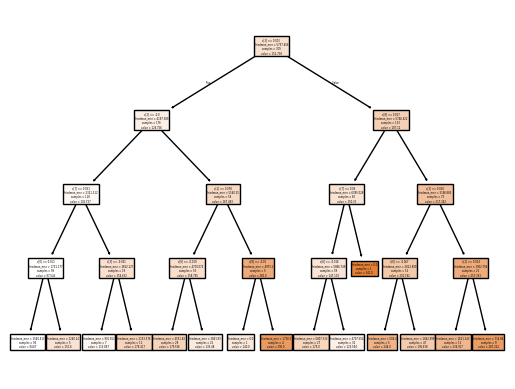

In [22]:
#selectmodel
selectmodel = DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='best')

selectmodel.fit(x_train,y_train)

#visualize the decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.Figure(figsize=(15, 10))
tree.plot_tree(selectmodel,filled=True)